In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/prodigy_inter/bank.csv")
df.head(5)#instead use
data = pd.read_csv("C:/Users/Lenovo/Desktop/prodigy_inter/bank.csv", 
                 delimiter=';')
data.rename(columns={'y':'deposit'}, inplace=True)
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


In [9]:
df.shape

(4119, 1)

In [12]:
print("Number of Duplicates: ",data.duplicated().sum(), "\n")
print(data.isna().sum())

Number of Duplicates:  0 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [13]:
print(data.shape, "\n\n")
print(data.columns, "\n\n")
print(data.dtypes, "\n\n")

(4119, 21) 


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object') 


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object 




In [14]:
categorical_cols = data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


In [15]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

numerical_cols = data.select_dtypes(exclude='object').columns
print("Numerical Columns:  ", numerical_cols)

Numerical Columns:   Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')


In [16]:
column = data[['age','duration',  'campaign']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
result = q3 - q1    #iqr as result
lower_bound = q1 - 1.5 * result
upper_bound = q3 + 1.5 * result
data[['age','duration',  'campaign']] = column[(column > lower_bound) & (column < upper_bound)]

In [17]:
# Exclude non-numeric columns
numeric_data = data.drop(columns = categorical_cols)
corr = numeric_data.corr()
print(corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.014048 -0.014169 -0.043425  0.050931   
duration        0.014048  1.000000 -0.218111 -0.093694  0.094206   
campaign       -0.014169 -0.218111  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.093694  0.058742  1.000000 -0.587941   
previous        0.050931  0.094206 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.063870  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482 -0.013338  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135  0.045889  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.067815  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.097339  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.063870       -0.013338       0.045889  -0.067815   
campaign            0.176079 

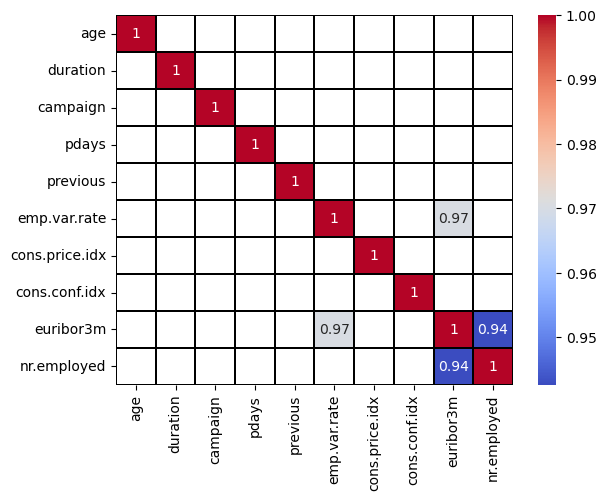

In [19]:
corr = corr[abs(corr) >= 0.90]
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2, linecolor='black')
plt.show()

In [20]:
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']

In [47]:
#Making a duplicate of the original dataset
df1 = data.copy()

In [48]:
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [49]:
df1.shape

(4119, 18)

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,0,0,0,0,0,0,0,0,0,250,1,20,0,0,8,4,0
1,21,0,0,0,0,0,0,0,0,0,250,3,20,0,0,18,16,0
2,7,0,0,0,0,0,0,0,0,0,224,0,20,0,0,23,8,0
3,20,0,0,0,0,0,0,0,0,0,14,2,20,0,0,23,8,0
4,29,0,0,0,0,0,0,0,0,0,55,0,20,0,0,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,0,0,0,0,0,0,0,0,50,0,20,0,0,17,6,0
4115,21,0,0,0,0,0,0,0,0,0,216,0,20,0,0,17,6,0
4116,9,0,0,0,0,0,0,0,0,0,61,1,20,1,0,8,4,0
4117,40,0,0,0,0,0,0,0,0,0,250,0,20,0,0,13,17,0


In [53]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [54]:
data_encoded = data1.apply(lb.fit_transform)
data_encoded
print(data_encoded['deposit'].value_counts())

deposit
0    4119
Name: count, dtype: int64


In [55]:
#Independent Variable
x = data_encoded.drop('deposit',axis=1)
#Dependent Variable
y = data_encoded['deposit']
#Check shape of X & Y
print("Shape of X: ", x.shape)
print("Shape of Y: ", y.shape, "\n\n")
#Check via printing the datatype of X & Y
print("Datatype of X & Y: ", type(x), type(y))

Shape of X:  (4119, 17)
Shape of Y:  (4119,) 


Datatype of X & Y:  <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def eval_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy_Score', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix\n', cm)
    
    print('Classification Report\n', classification_report(y_test, y_pred))

def mscore(model):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('Training Score', train_score)  
    print('Testing Score', test_score)

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [59]:
ypred_dtc = dtc.predict(x_test)
print(ypred_dtc)
print(eval_model(y_test, ypred_dtc))

[0 0 0 ... 0 0 0]
Accuracy_Score 1.0
Confusion Matrix
 [[1030]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030

None


In [60]:
from sklearn.tree import plot_tree
cn = ['no', 'yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


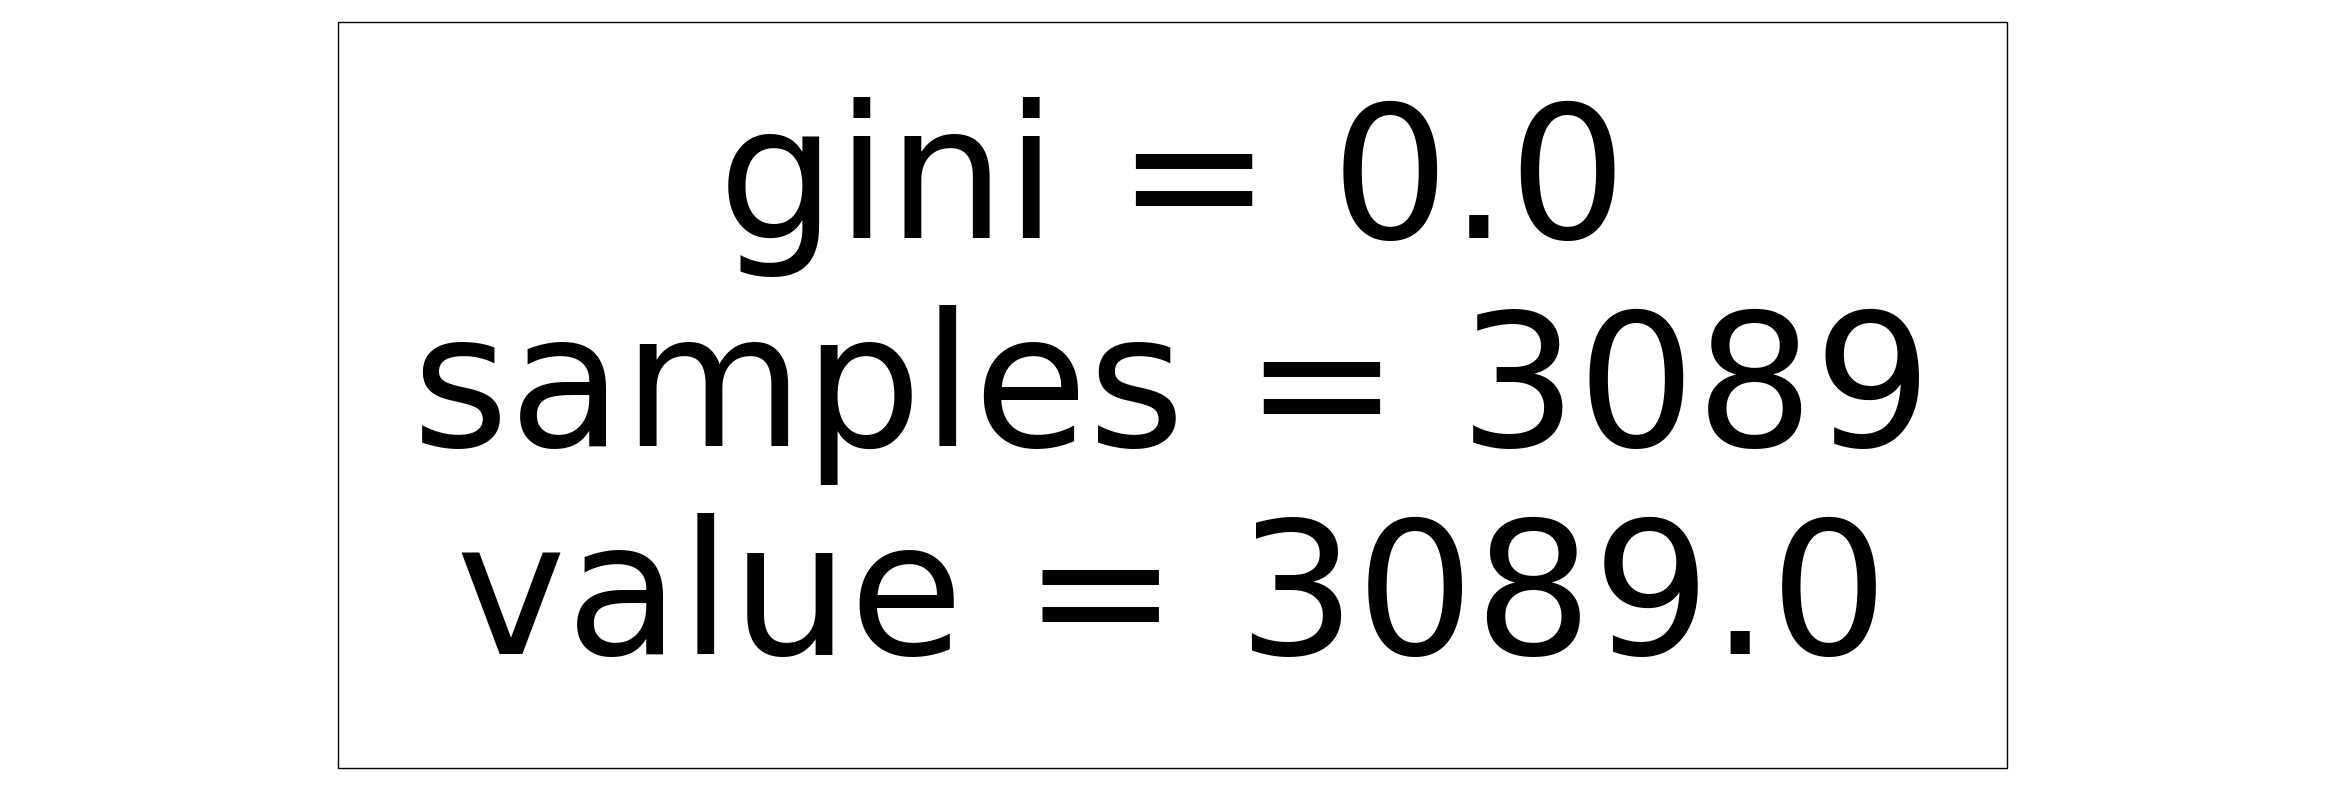

In [61]:
plt.figure(figsize=(30,10))
plot_tree(dtc, class_names=cn, filled=True)
plt.show()

In [62]:
dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

Training Score 1.0
Testing Score 1.0
Accuracy_Score 1.0
Confusion Matrix
 [[1030]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030



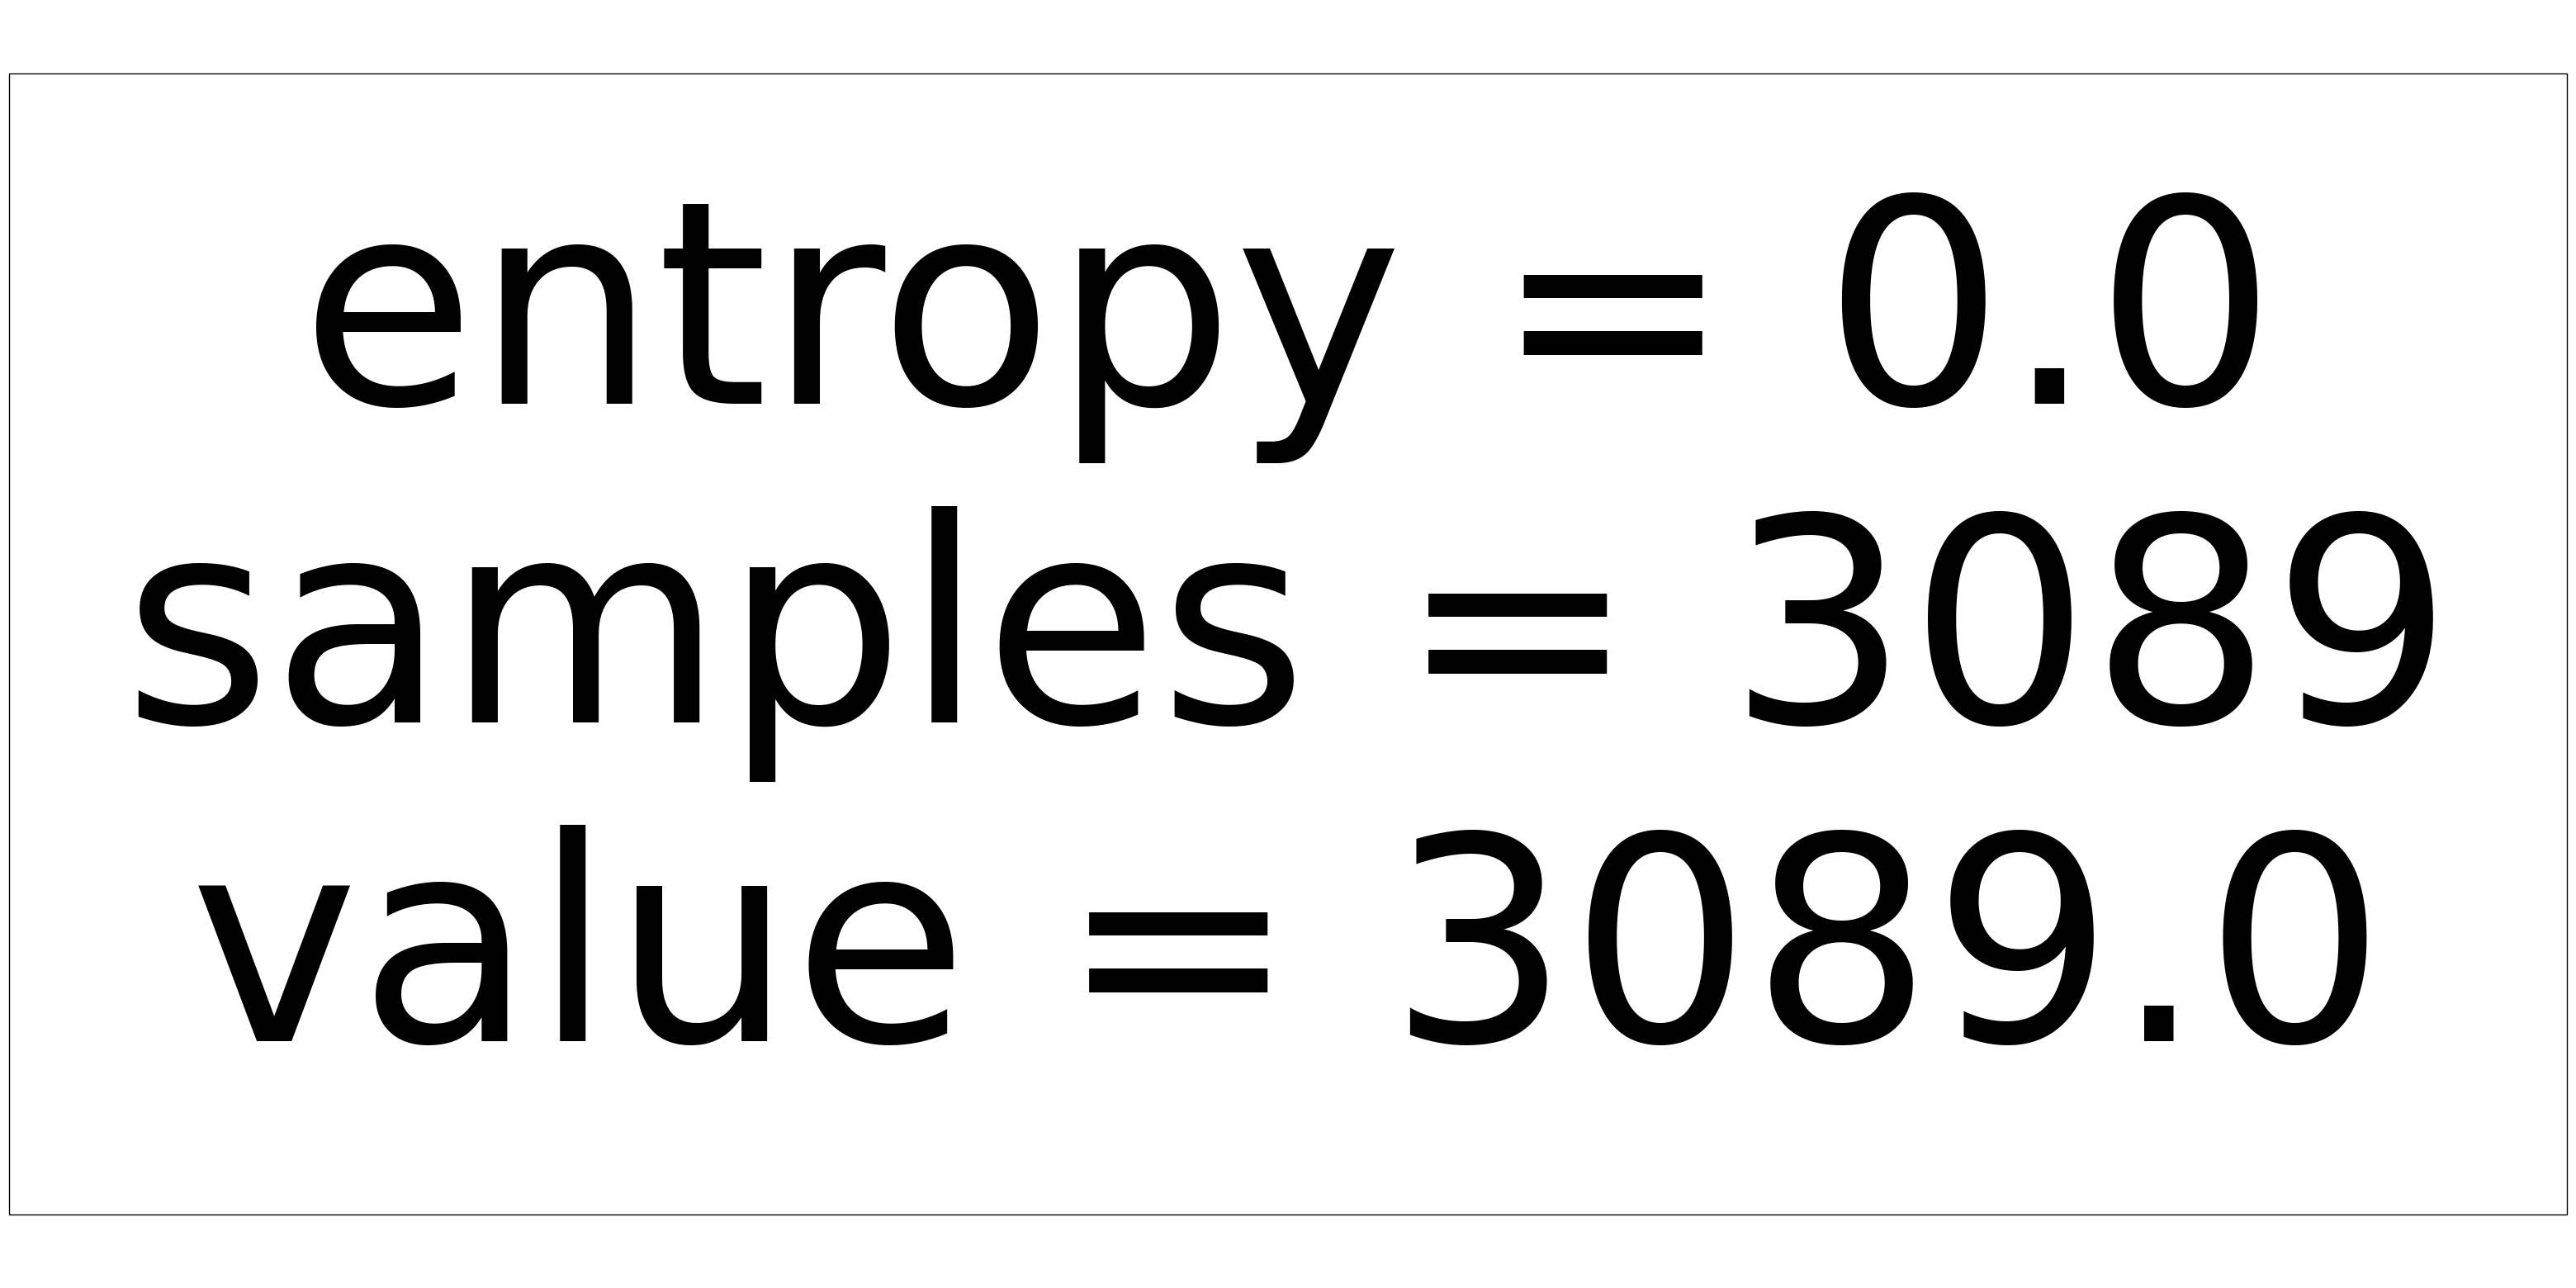

In [63]:
mscore(dtc1)
ypred_dtc1 = dtc1.predict(x_test)
eval_model(y_test, ypred_dtc1)
plt.figure(figsize=(40,20))
plot_tree(dtc1, class_names=cn, filled=True)
plt.show()